## Dowload dataset from here
https://www.kaggle.com/maksimeren/covid-19-literature-clustering/#data
https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

In [1]:
!pip install cdqa 

     |████████████████████████████████| 51kB 5.5MB/s eta 0:00:01
     |████████████████████████████████| 10.1MB 1.4MB/s eta 0:00:01    |██████▉                         | 2.2MB 2.1MB/s eta 0:00:04     |█████████████▌                  | 4.2MB 358kB/s eta 0:00:17     |█████████████▌                  | 4.3MB 358kB/s eta 0:00:17
     |████████████████████████████████| 317kB 1.2MB/s eta 0:00:01
     |████████████████████████████████| 10.5MB 1.1MB/s eta 0:00:01    |████████████████▎               | 5.4MB 2.0MB/s eta 0:00:03
     |████████████████████████████████| 59.9MB 84kB/s  eta 0:00:01    |▋                               | 1.2MB 1.2MB/s eta 0:00:51     |█▍                              | 2.5MB 1.1MB/s eta 0:00:53     |██                              | 3.6MB 519kB/s eta 0:01:49     |████▋                           | 8.6MB 777kB/s eta 0:01:06     |█████▌                          | 10.2MB 641kB/s eta 0:01:18     |██████▏                         | 11.5MB 1.4MB/s eta 0:00:35     |███████▍      

     |████████████████████████████████| 7.1MB 1.3MB/s eta 0:00:01     |███████████                     | 2.4MB 154kB/s eta 0:00:30
     |████████████████████████████████| 71kB 2.0MB/s eta 0:00:01
  Created wheel for cdqa: filename=cdqa-1.3.9-cp37-none-any.whl size=47640 sha256=1376bacfe99bf3ea0a22d71401402b2988b76eb12106f946b13ad54a65d8f15d
  Stored in directory: /Users/Jyanqa/Library/Caches/pip/wheels/8b/9a/68/d3f7651ea29c30d1bebc9e946bf5a8cf922e1c86fb6b8a33d9
  Created wheel for prettytable: filename=prettytable-0.7.2-cp37-none-any.whl size=13700 sha256=f55253734d377e4d29ab2c68c031ee6995177514d7f68750ce1b2e9416ca93c4
  Stored in directory: /Users/Jyanqa/Library/Caches/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Created wheel for tika: filename=tika-1.19-cp37-none-any.whl size=29224 sha256=ac44a12d023251ece415c2e47fa10b0dfc097428c3d572712be3fafc8f139e97
  Stored in directory: /Users/Jyanqa/Library/Caches/pip/wheels/b4/db/8a/3a3f0c0725448eaa92703e3dda71e29d

In [2]:
!pip install --upgrade pandas
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import re
import os
import json
import nltk 
from math import log, sqrt
from collections import defaultdict
from copy import deepcopy
import glob

Requirement already up-to-date: pandas in /Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages (1.1.5)


In [208]:
# Load csv to dataframe
my_df= pd.DataFrame([])

#change to your source path
file_path = "/Users/Jyanqa/Desktop/zFinal project/archive/"

#prevent lag in computers
for df in pd.read_csv(file_path+'metadata.csv', iterator=True, chunksize=10000):  
    my_df = my_df.append(pd.DataFrame(df))

my_df.head()

cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                                                                                                              title  \
0  Clinical features of culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia   
1                                                                        Nitric oxide: a pro-inflammatory mediator in lung disease?   
2                                                                                   Surfactant protein-D and pulmonary host defense   
3                                                                                              Role of endothelin-1 in lung disease   
4                                                          Gene expression in epithelial cells in response to pneumovirus infection   

                     doi     pmcid pubmed_id license  \
0  10.1186/1471-2334-1-6  PMC35282  11472636   no-cc   
1           10.1186/rr14  PMC59543  11667967   no-cc   
2           10.1186/rr19  PMC59549  11667972   no-cc   
3           10.1186/rr44  PMC59574  11686871   no-cc   
4           10.1186/rr61  PMC59580  11686888   no-cc   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  abstract  \
0  OBJECTIVE: This retrospective chart review describes the epidemiology and clinical features of 40 patients with culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia. METHODS: Patients with positive M. pneumoniae cultures from respiratory specimens from January 1997 through December 1998 were identified through the Microbiology records. Charts of patients were reviewed. RESULTS: 40 patients were identified, 33 (82.5%) of whom required admission. Most infections (92.5%) were community-acquired. The infection affected all age groups but was mo

In [114]:
my_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381817 entries, 0 to 381816
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          381817 non-null  object 
 1   sha               132039 non-null  object 
 2   source_x          381817 non-null  object 
 3   title             381631 non-null  object 
 4   doi               221346 non-null  object 
 5   pmcid             138753 non-null  object 
 6   pubmed_id         194467 non-null  object 
 7   license           381817 non-null  object 
 8   abstract          273771 non-null  object 
 9   publish_time      381378 non-null  object 
 10  authors           369864 non-null  object 
 11  journal           356980 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  144150 non-null  object 
 14  arxiv_id          4990 non-null    object 
 15  pdf_json_files    132039 non-null  object 
 16  pmc_json_files    10

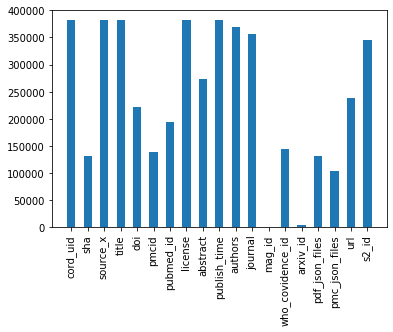

In [209]:
# find valid entries for each column
def display_barchart(my_df):
    column = my_df.columns.tolist()
    # https://datatofish.com/convert-pandas-dataframe-to-list/
    valid_cnt = list(my_df.count())
    # Visualize the valid entries with bar chart
    plt.bar(column,valid_cnt,align = "center",width = 0.5,alpha = 1)
    plt.xticks(rotation=90)

    
display_barchart(my_df)

In [210]:
my_df.drop_duplicates(subset=['title'],keep='first')
my_df.drop_duplicates(subset=['abstract'],keep='first')
my_df.drop_duplicates(subset=['doi'],keep='first')
my_df.count()

cord_uid            381817
sha                 132039
source_x            381817
title               381631
doi                 221346
pmcid               138753
pubmed_id           194467
license             381817
abstract            273771
publish_time        381378
authors             369864
journal             356980
mag_id                   0
who_covidence_id    144150
arxiv_id              4990
pdf_json_files      132039
pmc_json_files      102984
url                 239200
s2_id               344704
dtype: int64

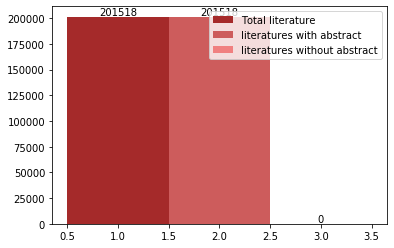

In [366]:
#abstract info
valid_cnt = list(my_df.count())
with_abstract = valid_cnt[8]
total = valid_cnt[0]
without_abstract  = total - with_abstract

tot = plt.bar(1,total,color='brown',width = 1)
plt.annotate(str(total), xy=(1,total), ha='center', va='bottom')

abstract = plt.bar(2,with_abstract,color='indianred',width = 1)
plt.annotate(str(with_abstract), xy=(2,with_abstract), ha='center', va='bottom')

lost = plt.bar(3,without_abstract,color='lightcoral',width = 1)
plt.annotate(str(without_abstract), xy=(3,without_abstract), ha='center', va='bottom')

plt.legend((tot, abstract,lost), ('Total literature', 'literatures with abstract','literatures without abstract'))

In [212]:
#delete na row
my_df.dropna(how='all')

#delete rows without abstract
my_df.dropna(subset=['abstract'],inplace=True)
my_df.count()

cord_uid            273771
sha                 108956
source_x            273771
title               273731
doi                 168000
pmcid               101665
pubmed_id           150741
license             273771
abstract            273771
publish_time        273378
authors             270929
journal             252210
mag_id                   0
who_covidence_id     92328
arxiv_id              4990
pdf_json_files      108956
pmc_json_files       83193
url                 182948
s2_id               250752
dtype: int64

In [213]:
#Delete literatures that was published before 2019
my_df = my_df[pd.DatetimeIndex(my_df.publish_time).year>2018]
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201518 entries, 3480 to 381816
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          201518 non-null  object 
 1   sha               74072 non-null   object 
 2   source_x          201518 non-null  object 
 3   title             201478 non-null  object 
 4   doi               106112 non-null  object 
 5   pmcid             64761 non-null   object 
 6   pubmed_id         85730 non-null   object 
 7   license           201518 non-null  object 
 8   abstract          201518 non-null  object 
 9   publish_time      201518 non-null  object 
 10  authors           199419 non-null  object 
 11  journal           180711 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  91113 non-null   object 
 14  arxiv_id          4799 non-null    object 
 15  pdf_json_files    74072 non-null   object 
 16  pmc_json_files   

In [214]:
covid_terms =['covid', 'coronavirus disease 19', 'sars cov 2', '2019 ncov', '2019ncov', '2019 n cov', '2019n cov',
              'ncov 2019', 'n cov 2019', 'coronavirus 2019', 'wuhan pneumonia', 'wuhan virus', 'wuhan coronavirus',
              'coronavirus 2', 'covid-19', 'SARS-CoV-2', '2019-nCov']
covid_terms = [elem.lower() for elem in covid_terms]
covid_terms = re.compile('|'.join(covid_terms))

def checkYear(date):
    return int(date[0:4])

def checkCovid(row, covid_terms):
    return bool(covid_terms.search(row['abstract'].lower())) and checkYear(row['publish_time']) > 2019

In [215]:
my_df['is_covid'] = my_df.apply(checkCovid, axis=1, covid_terms=covid_terms)
my_df.head()

cord_uid                                       sha source_x  \
3480  gcj14snd  1d05dbf38f98918269d71020f0c9ff616548c2df      PMC   
3562  qlwzl5mq  4c7f6c52fe043745887db5406196b1d5099c9614      PMC   
3581  eqgc8v7y  e5c06914d0daee6e881665b23adca340d0a6271a      PMC   
3593  c22kw6f4  ae56d60debc175395e6269fc5bf9184291e71a56      PMC   
3594  hbpk850a  ca8f30a35b564945dd2588c382a0e181a1e08662      PMC   

                                                                                                                                                                      title  \
3480                                             Human rhinovirus spatial-temporal epidemiology in rural coastal Kenya, 2015-2016, observed through outpatient surveillance   
3562                                                                            Multiple Introductions of Domestic Cat Feline Leukemia Virus in Endangered Florida Panthers   
3581                                                                         Impact of glucose-6-phosphate dehydrogenase deficiency on dengue infection in Myanmar children   
3593  Improvement in the survival rates of extracorporeal membrane oxygenation-supported respiratory failure patients: a multicenter retrospective study in Korean patients   
3594                                                                                                        Mental health workers perceptions of disaster response in China   

                                   doi       pmcid pubmed_id license  \
3480  10.12688/wellcomeopenres.14836.2  PMC6234744  30483602   cc-by   
3562            10.3201/eid2501.181347  PMC6302599  30561312   no-cc   
3581      10.1371/journal.pone.0209204  PMC6314580  30601843   cc-by   
3593         10.1186/s13054-018-2293-5  PMC6318967  30606235   cc-by   
3594         10.1186/s12889-018-6313-9  PMC6318987  30606149   cc-by   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [216]:
df_covid_only = my_df[my_df['is_covid']==True]
df_covid_only = df_covid_only.reset_index(drop=True)
df_covid_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136215 entries, 0 to 136214
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          136215 non-null  object 
 1   sha               48098 non-null   object 
 2   source_x          136215 non-null  object 
 3   title             136183 non-null  object 
 4   doi               63265 non-null   object 
 5   pmcid             40118 non-null   object 
 6   pubmed_id         50824 non-null   object 
 7   license           136215 non-null  object 
 8   abstract          136215 non-null  object 
 9   publish_time      136215 non-null  object 
 10  authors           135642 non-null  object 
 11  journal           120008 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  70532 non-null   object 
 14  arxiv_id          2843 non-null    object 
 15  pdf_json_files    48098 non-null   object 
 16  pmc_json_files    32

In [217]:
key_words = ['transmission','transmitted','long','symptomatic','asymptomatic','infected','infection','range', 'incubation', 'periods', 'surfaces', 'prevent','protective','SARS-CoV-2','infectious','reported','respiratory', 'secretions', 'saliva', 'droplets','short', 'time', 'fomites','sanitation']
pattern = '|'.join(key_words)
df_covid_only = df_covid_only.loc[df_covid_only['abstract'].str.contains(pattern, case=False)]
df_covid_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113474 entries, 0 to 136213
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          113474 non-null  object 
 1   sha               41355 non-null   object 
 2   source_x          113474 non-null  object 
 3   title             113452 non-null  object 
 4   doi               53925 non-null   object 
 5   pmcid             33767 non-null   object 
 6   pubmed_id         42970 non-null   object 
 7   license           113474 non-null  object 
 8   abstract          113474 non-null  object 
 9   publish_time      113474 non-null  object 
 10  authors           113130 non-null  object 
 11  journal           100162 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  57752 non-null   object 
 14  arxiv_id          2243 non-null    object 
 15  pdf_json_files    41355 non-null   object 
 16  pmc_json_files    27

In [218]:
#if the result is correct?
pd.options.display.max_colwidth = 100000
df_covid_only.head().abstract
#display_barchart(df_covid_only)

0    A novel coronavirus (2019-nCoV) originating in Wuhan, China presents a potential respiratory viral pandemic to the world population. Current efforts are focused on containment and quarantine of infected individuals. Ultimately, the outbreak could be controlled with a protective vaccine to prevent 2019-nCoV infection. While vaccine research should be pursued intensely, there exists today no therapy to treat 2019-nCoV upon infection, despite an urgent need to find options to help these patients and preclude potential death. Herein, I review the potential options to treat 2019-nCoV in patients, with an emphasis on the necessity for speed and timeliness in developing new and effective therapies in this outbreak. I consider the options of drug repurposing, developing neutralizing monoclonal antibody therapy, and an oligonucleotide strategy targeting the viral RNA genome, emphasizing the promise and pitfalls of these approaches. Finally, I advocate for the fastest strategy to develop a 

In [219]:
#Keep files contain the json_file linked within them
#because these are the json files which contain the original info of the article
df_covid_only.dropna(subset=['pdf_json_files'],inplace=True)
df_covid_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41355 entries, 0 to 136213
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          41355 non-null  object 
 1   sha               41355 non-null  object 
 2   source_x          41355 non-null  object 
 3   title             41355 non-null  object 
 4   doi               39778 non-null  object 
 5   pmcid             31857 non-null  object 
 6   pubmed_id         30166 non-null  object 
 7   license           41355 non-null  object 
 8   abstract          41355 non-null  object 
 9   publish_time      41355 non-null  object 
 10  authors           41317 non-null  object 
 11  journal           33153 non-null  object 
 12  mag_id            0 non-null      float64
 13  who_covidence_id  0 non-null      object 
 14  arxiv_id          1667 non-null   object 
 15  pdf_json_files    41355 non-null  object 
 16  pmc_json_files    26311 non-null  objec

In [220]:
base_path = '/Users/Jyanqa/Desktop/zFinal project/archive/'
all_selected_json = df_covid_only['pdf_json_files']
# print(all_selected_json)
print(base_path+all_selected_json[0])

/Users/Jyanqa/Desktop/zFinal project/archive/document_parses/pdf_json/5a17ed3e4abf295f5820c65f56398266c1baae98.json


In [221]:
# This piece of code was adopted from the original source at:
# https://www.kaggle.com/xhlulu/cord-19-eda-parse-json-and-generate-clean-csv/notebook 

def format_name(author):
    middle_name = " ".join(author['middle'])
    if author['middle']:
        return " ".join([author['first'], middle_name, author['last']])
    else:
        return " ".join([author['first'], author['last']])

def format_affiliation(affiliation):
    text = []
    location = affiliation.get('location')
    if location:
        text.extend(list(affiliation['location'].values()))
    institution = affiliation.get('institution')
    if institution:
        text = [institution] + text
    return ", ".join(text)

def format_authors(authors, with_affiliation=False):
    name_ls = []
    for author in authors:
        name = format_name(author)
        if with_affiliation:
            affiliation = format_affiliation(author['affiliation'])
            if affiliation:
                name_ls.append(f"{name} ({affiliation})")
            else:
                name_ls.append(name)
        else:# First, for each query the system arranges all the scientific papers within the corpus in the relevant order.
# Second, the system analize texts of top N the mosr relevant papers to answer to the query in the best way.
            name_ls.append(name)
    return ", ".join(name_ls)

def format_body(body_text):
    texts = [(di['section'], di['text']) for di in body_text]
    texts_di = {di['section']: "" for di in body_text}
    for section, text in texts:
        texts_di[section] += text
    body = ""
    for section, text in texts_di.items():
        body += section
        body += "\n\n"
        body += text
        body += "\n\n"
    return body

def format_bib(bibs):
    if type(bibs) == dict:
        bibs = list(bibs.values())
    bibs = deepcopy(bibs)
    formatted = []
    for bib in bibs:
        bib['authors'] = format_authors(
            bib['authors'], 
            with_affiliation=False
        )
        formatted_ls = [str(bib[k]) for k in ['title', 'authors', 'venue', 'year']]
        formatted.append(", ".join(formatted_ls))
    return "; ".join(formatted)

def load_files(file_count,filenames_selected = all_selected_json):
#     filenames = os.listdir(dirname)

    raw_files = []
#     if filename:
#         filename = dirname + filename
#         raw_files = [json.load(open(filename, 'rb'))]
#     else:
#         #for filename in tqdm(filenames):
    i = 0
    for filename in filenames_selected:
        if i == file_count:
            break
        
        try:
            file = json.load(open(filename, 'rb'))
            raw_files.append(file)   
            i = i+1
        except:
            try:
                filename = base_path + filename
                file = json.load(open(filename, 'rb'))
                raw_files.append(file)
                i = i+1
            except:
                x = 1
                #print(filename)
    return raw_files
    

def generate_clean_df(all_files):
    cleaned_files = []
    #for file in tqdm(all_files):
#     i = 0
    for file in all_files:
#         if i == 500:
#             break
# #         print(i)
#         i  = i + 1
        features = [
            file['paper_id'],
            file['metadata']['title'],
            format_authors(file['metadata']['authors']),
            format_authors(file['metadata']['authors'], 
                           with_affiliation=True),
            format_body(file['abstract']),
            format_body(file['body_text']),
            format_bib(file['bib_entries']),
            file['metadata']['authors'],
            file['bib_entries']
        ]
        cleaned_files.append(features)
    col_names = ['paper_id', 'title', 'authors',
                 'affiliations', 'abstract', 'text', 
                 'bibliography','raw_authors','raw_bibliography']
    clean_df = pd.DataFrame(cleaned_files, columns=col_names)
    clean_df = clean_df.drop(columns=['authors','affiliations','bibliography',
                                      'raw_authors','raw_bibliography'])
    return clean_df

In [222]:
def get_corpus():
    num_of_papers = {}
    corpus = pd.DataFrame(columns=['paper_id','title','abstract','text'])
    
    file_count = 1000 #try to extract 1000 articles. 
    
    print('Reading ', file_count, 'json files')
#     num_of_papers[folder_names[i]] = len(filenames)
    print('.....Please wait for a while......')
    files = load_files(file_count)
    print('Generating clean dataframe')
    df = generate_clean_df(files)
    print('Generated......')
    print('Forming Corpus.......')
    corpus = pd.concat([corpus, df], ignore_index=True, sort=False)
    
    print('Corpus includes {0} scientific articles.'.format(len(corpus)))
    return corpus, num_of_papers

corpus, num_of_papers = get_corpus()

Reading  1000 json files
.....Please wait for a while......
Generating clean dataframe
Generated......
Forming Corpus.......
Corpus includes 1000 scientific articles.


## Add word_count column

In [223]:
corpus['abstract_word_count'] = corpus['abstract'].apply(lambda x: len(x.strip().split()))  # word count in abstract
corpus['body_word_count'] = corpus['text'].apply(lambda x: len(x.strip().split()))  # word count in body
corpus['body_unique_words']=corpus['text'].apply(lambda x:len(set(str(x).split())))  # number of unique words in body
corpus.head()

paper_id  \
0  5a17ed3e4abf295f5820c65f56398266c1baae98   
1  36e2047d1674c3095617f3eb97f9f61e48989dfe   
2  d049cc13cfc0854eef6913f1c11eece8792b89fc   
3  670f5fc39bbb8591f12fbd8b4192ca3f12dd8791   
4  3cc8e5005005a3129a3531f80acb35cf22f2dc00   

                                                                                                                                                                                           title  \
0  Open Peer Review Therapeutic strategies in an outbreak scenario to treat the novel coronavirus originating in Wuhan, China [version 2; peer review: 2 approved] , Cepheid, Danaher Diagnostic   
1                                                                                                                                Artificial Intelligence (AI) applications for COVID-19 pandemic   
2                                                                  Practical Considerations When Performing Neurodiagnostic Studies on Patients with COVID-19 and Other Highly Virulent Diseases   
3                                                                                                                                                               Pandemic on Imaging Case Volumes   
4                                                            of the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)(https://creativecommons.org/licenses/by-nc/4.0/)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     abstract  \
0  Abstract\n\nA novel coronavirus (2019-nCoV) originating in Wuhan, China presents a potential respiratory viral pandemic to the world population. Current efforts are focused on containment and quarantine of infected individuals. Ultimately, the outbreak could be controlled with a protective vaccine to prevent 2019-nCoV infection. While vaccine research should be pursued intensely, there exists today no therapy to treat 2019-nCoV upon infection, despite an urgent need to find options to help these patients and preclude 

In [22]:
corpus['abstract'].describe()

count     1000
unique     770
top           
freq       229
Name: abstract, dtype: object

### Handle Possible Duplicates

In [225]:
corpus.drop_duplicates(['abstract', 'text'], inplace=True)
corpus['abstract'].describe(include='all')
corpus['text'].describe(include='all')

count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [226]:
corpus.describe()


abstract_word_count  body_word_count  body_unique_words
count          1000.000000      1000.000000        1000.000000
mean            157.224000      3577.335000        1246.595000
std             136.663831      2599.783908         674.500448
min               0.000000        78.000000          66.000000
25%              27.250000      1892.750000         807.750000
50%             157.000000      2919.500000        1090.500000
75%             236.000000      4417.500000        1513.750000
max            1613.000000     22693.000000        5063.000000

## Data preprocessing

In [227]:
df = corpus
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             1000 non-null   object
 1   title                1000 non-null   object
 2   abstract             1000 non-null   object
 3   text                 1000 non-null   object
 4   abstract_word_count  1000 non-null   int64 
 5   body_word_count      1000 non-null   int64 
 6   body_unique_words    1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 62.5+ KB


### Handling multiple languages

Next we are going to determine the language of each paper in the dataframe. Not all of the sources are English and the language needs to be identified so that we know how handle these instances

In [47]:
!pip install langdetect

     |████████████████████████████████| 983kB 771kB/s eta 0:00:01
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=f501ffe98a37f9691e5369fa4ec11ed904170a59612d4c45b2fffcf197d74fbb
  Stored in directory: /Users/Jyanqa/Library/Caches/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [228]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(df))):
    # split by space into list, take the first x intex, join with space
    text = df.iloc[ii]['text'].split(" ")
    
    lang = "en" #doi thanh italia xem sao
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:
            
            try:
                # let's try to label it through the abstract then
                lang = detect(df.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language    
    languages.append(lang)

100%|██████████| 1000/1000 [00:14<00:00, 68.13it/s]


In [229]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 1000

{'de': 25, 'en': 966, 'es': 1, 'fr': 3, 'it': 1, 'ja': 1, 'ko': 1, 'pt': 2}


**Plot the language distribution of the dataset**

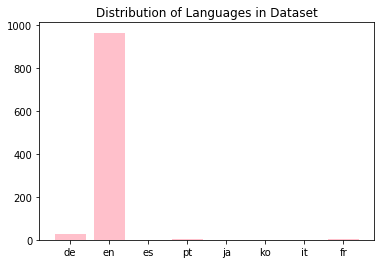

In [230]:
df['language'] = languages
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center',color = 'pink')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.show()

In [231]:
#Drop the language that is not English
df = df[df['language'] == 'en'] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             966 non-null    object
 1   title                966 non-null    object
 2   abstract             966 non-null    object
 3   text                 966 non-null    object
 4   abstract_word_count  966 non-null    int64 
 5   body_word_count      966 non-null    int64 
 6   body_unique_words    966 non-null    int64 
 7   language             966 non-null    object
dtypes: int64(3), object(5)
memory usage: 67.9+ KB


In [62]:
!pip install scispacy

     |████████████████████████████████| 51kB 1.2MB/s eta 0:00:01
     |████████████████████████████████| 901kB 1.6MB/s eta 0:00:01
     |████████████████████████████████| 71kB 700kB/s eta 0:00:01
     |████████████████████████████████| 10.2MB 268kB/s eta 0:00:01    |█▍                              | 440kB 1.2MB/s eta 0:00:09
     |████████████████████████████████| 194kB 147kB/s eta 0:00:01
     |████████████████████████████████| 112kB 84kB/s eta 0:00:01
     |████████████████████████████████| 972kB 121kB/s eta 0:00:01
     |████████████████████████████████| 71kB 85kB/s eta 0:00:01
     |████████████████████████████████| 5.8MB 279kB/s eta 0:00:01     |███████▎                        | 1.3MB 117kB/s eta 0:00:38     |███████▊                        | 1.4MB 328kB/s eta 0:00:14     |██████████                      | 1.8MB 353kB/s eta 0:00:12
     |████████████████████████████████| 184kB 232kB/s eta 0:00:01
ERROR: cdqa 1.3.9 has requirement pandas==0.25.0, but you'll have pandas 1.1.5 which 

In [6]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz

     |████████████████████████████████| 500.6MB 9.0kB/s eta 0:00:010  |▍                               | 5.5MB 629kB/s eta 0:13:07     |▍                               | 6.0MB 1.2MB/s eta 0:06:50     |▊                               | 10.7MB 707kB/s eta 0:11:33     |█                               | 14.5MB 635kB/s eta 0:12:46     |█▏                              | 17.4MB 976kB/s eta 0:08:15     |███                             | 47.6MB 930kB/s eta 0:08:07     |███▍                            | 53.5MB 242kB/s eta 0:30:44     |████▏                           | 65.9MB 1.3MB/s eta 0:05:29     |█████▌                          | 85.6MB 1.6MB/s eta 0:04:18     |██████▋                         | 103.9MB 1.9MB/s eta 0:03:24     |██████▉                         | 106.1MB 2.5MB/s eta 0:02:39     |███████                         | 109.5MB 1.7MB/s eta 0:03:55     |███████▎                        | 114.7MB 800kB/s eta 0:08:02     |███████▍                        | 115.0MB 1.3MB/s eta 0:04:57     |██

In [30]:
#NLP 
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg 

/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_sci_lg' (0.2.4) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


**finding and removing stopword**

In [232]:
import string

punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:10]


['few', 'another', 'seem', 'we', 'thru', 'until', '’d', 'in', 'one', 'next']

In [233]:
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI', 'www'
]

for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

This function will convert text to lower case, remove punctuation, and find and remove stopwords. For the parser, we will use en_core_sci_lg. This is a model for processing biomedical, scientific or clinical text.

In [234]:
# Parser
parser = en_core_sci_lg.load(disable=["tagger", "ner"])
parser.max_length = 7000000

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_sci_lg' (0.2.4) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [235]:
tqdm.pandas() #show progress bar
df["processed_text"] = df["text"].progress_apply(spacy_tokenizer)

/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 966/966 [10:25<00:00,  1.54it/s]
/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Vectorization

In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

In [237]:
text = df['processed_text'].values
X = vectorize(text, 2 ** 12)
X.shape

(966, 4096)

<mark> The colums text of data frame now is converted to a matrix with 996 vectors and 4096 features (predictors) </mark>

## PCA and Clustering

Let's see how much we can reduce the dimensions while still keeping 95% variance.
<br>
<br> </br>
We will apply Principle Component Analysis (PCA) to our vectorized data. The reason for this is that by keeping a large number of dimensions with PCA, you don’t destroy much of the information, but hopefully will remove some noise/outliers from the data, and make the clustering problem easier for k-means. </br>


In [238]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(966, 708)

**Distortion computes the sum of squared distances from each point to its assigned center. When distortion is plotted against k there will be a k value after which decreases in distortion are minimal. This is the desired number of clusters.**

In [38]:
from sklearn.cluster import KMeans

In [277]:
#Find the best k value for k-means
from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(2, 50)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    #print('Found distortion for {} clusters'.format(k))

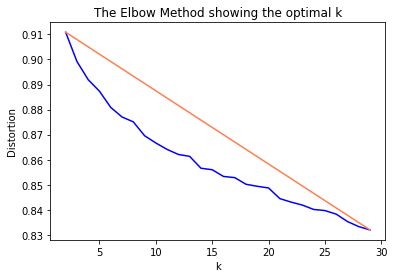

In [245]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'coral')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

<mark> The number of k is not clear, it might be **10 clusters** </mark>

In [42]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans


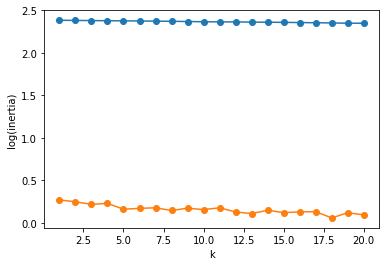

In [278]:
def compute_inertia(a, X_reduced):
    W = [np.mean(pairwise_distances(X_reduced[a == c, :])) for c in np.unique(a)]
    return np.mean(W)

def compute_gap(clustering, data, k_max=20, n_references=40):
    if len(data.shape) == 1:
        data = data.reshape(-1, 1)
    reference = np.random.rand(*data.shape)
    reference_inertia = []
    for k in range(1, k_max+1):
        local_inertia = []
        for _ in range(n_references):
            clustering.n_clusters = k
            assignments = clustering.fit_predict(reference)
            local_inertia.append(compute_inertia(assignments, reference))
        reference_inertia.append(np.mean(local_inertia))
    
    ondata_inertia = []
    for k in range(1, k_max+1):
        clustering.n_clusters = k
        assignments = clustering.fit_predict(data)
        ondata_inertia.append(compute_inertia(assignments, data))
        
    gap = np.log(reference_inertia)-np.log(ondata_inertia)
    return gap, np.log(reference_inertia), np.log(ondata_inertia)

k_max = 20
gap, reference_inertia, ondata_inertia = compute_gap(KMeans(), X_reduced, k_max)


plt.plot(range(1, k_max+1), reference_inertia,
         '-o', label='reference')
plt.plot(range(1, k_max+1), ondata_inertia,
         '-o', label='data')
plt.xlabel('k')
plt.ylabel('log(inertia)')
plt.show()

Text(0.5, 1.0, 'The Gap Statistics Method showing the optimal k')

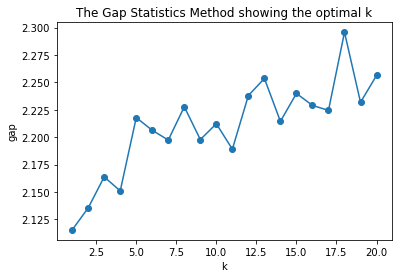

In [367]:
plt.plot(range(1, k_max+1), gap, '-o')
plt.ylabel('gap')
plt.xlabel('k')
plt.title('The Gap Statistics Method showing the optimal k')

 <mark> The number of k suggested by **GAP Statistics** is **17** </mark>

### Viet ve gap stats and elbow method to estimate the k cluster
https://glowingpython.blogspot.com/2019/01/a-visual-introduction-to-gap-statistics.html

In [280]:
#Run the k-means in reduced dataset X_reduced
k = 17
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred

/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [281]:
X_reduced.shape

(966, 708)

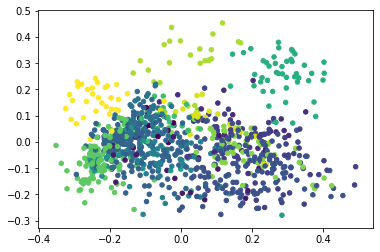

In [384]:
#Plot it but clusters are not apart from each other.
plt.scatter(X_reduced[:, 0], X_reduced[:, 2], c=y_pred, s=20, cmap='viridis')

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);

In [252]:
df.head() #processed_text and y are two columns added to the original dataframe

paper_id  \
0  5a17ed3e4abf295f5820c65f56398266c1baae98   
1  36e2047d1674c3095617f3eb97f9f61e48989dfe   
2  d049cc13cfc0854eef6913f1c11eece8792b89fc   
3  670f5fc39bbb8591f12fbd8b4192ca3f12dd8791   
5  6f176163cef915f36cdcb6ed5d99e497d0536c6d   

                                                                                                                                                                                           title  \
0  Open Peer Review Therapeutic strategies in an outbreak scenario to treat the novel coronavirus originating in Wuhan, China [version 2; peer review: 2 approved] , Cepheid, Danaher Diagnostic   
1                                                                                                                                Artificial Intelligence (AI) applications for COVID-19 pandemic   
2                                                                  Practical Considerations When Performing Neurodiagnostic Studies on Patients with COVID-19 and Other Highly Virulent Diseases   
3                                                                                                                                                               Pandemic on Imaging Case Volumes   
5                                                                                                                  Frontline workers sound the alarm: be always sure you're right, then go ahead   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     abstract  \
0  Abstract\n\nA novel coronavirus (2019-nCoV) originating in Wuhan, China presents a potential respiratory viral pandemic to the world population. Current efforts are focused on containment and quarantine of infected individuals. Ultimately, the outbreak could be controlled with a protective vaccine to prevent 2019-nCoV infection. While vaccine research should be pursued intensely, there exists today no therapy to treat 2019-nCoV upon infection, despite an urgent need to find options to help these patients and preclude 

## Topic of Each Cluster 
Now we will attempt to find the most significant words in each clusters. K-means clustered the articles but did not label the topics. Through topic modeling we will find out what the most important terms for each cluster are. This will add more meaning to the cluster by giving keywords to quickly identify the themes of the cluster.

For topic modeling, we will use LDA (Latent Dirichlet Allocation). In LDA, each document can be described by a distribution of topics and each topic can be described by a distribution of words.

In [51]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [283]:
#creatng 17 vectorizers, one for each of our cluster labels
vectorizers = []
    
for ii in range(0, 17):
    # Creating a vectorizer
    vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))

In [284]:
vectorizers[0]

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='[a-zA-Z\\-][a-zA-Z\\-]{2,}',
                tokenizer=None, vocabulary=None)

In [285]:
#we will vectorize the data from each of our clusters
vectorized_data = []

for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(df.loc[df['y'] == current_cluster, 'processed_text']))
    except Exception as e:
        print("Not enough instances in cluster: " + str(current_cluster))
        vectorized_data.append(None)

In [286]:
len(vectorized_data)

17

In [287]:
# number of topics per cluster
NUM_TOPICS_PER_CLUSTER = len(vectorized_data)

lda_models = []
for ii in range(0, 17):
    # Latent Dirichlet Allocation Model
    lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online',verbose=False, random_state=42)
    lda_models.append(lda)
    
lda_models[0]

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=17, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=False)

In [288]:
#fit_transform all the LDA models on their respective cluster vectors
clusters_lda_data = []

for current_cluster, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_cluster))
    
    if vectorized_data[current_cluster] != None:
        clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))

In [289]:
# Func. printing keywords for each topic
def selected_topics(model, vectorizer, top_n=5):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

In [351]:
all_keywords = []
for current_vectorizer, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_vectorizer))

    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))

In [352]:
len(all_keywords)

17

In [292]:
clust_key = pd.DataFrame([all_keywords])
clust_key.columns =['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4','Cluster 5','Cluster 6','Cluster 7','Cluster 8','Cluster 9', 'Cluster 10', 'Cluster 11', 'Cluster 12', 'Cluster 13','Cluster 14','Cluster 15','Cluster 16','Cluster 17']
clust_key

Cluster 1  \
0  [water, chamber, inactivation, dose, power, produce, nozzle, person, spray, radiation, distance, size, solution, provide, device, uv-c, sanitization, lamp, box, cough, procedure, disinfectant, time, sars-cov-, hand, patient, droplet, line, method, air, large, study, sterilization, particle, position, worker, value, world, infection, achieve, efficient]   

                                                                                                                                                                                                                                                                                                                                                                                                             Cluster 2  \
0  [patient, infection, case, medical, life, school, social, risk, respondent, survey, mental, future, increase, surgical, support, factor, procedure, service, provider, physical, country, guideline, delivery, home, time, death, datum, anxiety, practice, impact, pediatric, report, pandemic, family, stress, experience, study, woman, present, use, article, unit, state, hand, nurse, parent, reduce, manage]   

                                                                                                                                                                                                                                                                                 Cluster 3  \
0  [day, kit, concentration, control, laboratory, diagnostic, distribution, cdc, numb, sensitivity, diagnosis, specimen, viral, patient, study, sars-cov-, temperature, rt-pcr, amplification, swab, disease, infection, process, datum, symptom, negative, antibody, report, virus, high]   

                                                                                                                                                                                                                                                                                                                                               Cluster 4  \
0  [protein, vaccine, cell, human, sars-cov, detection, mutation, test, sample, approach, strain, genome, assay, asymptomatic, neutralization, igg, titer, subject, infectious, day, experiment, rate, rbd, ace, wuhan, outbreak, symptom, library, gene, nsp, bind, immune, case, sequence, model, respiratory, rna, host, receptor, antibody, patient]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Cluster 5  \
0  [treatment, severe, test, surgery, level, need, symptom, swab, viral, report, sars-cov-, study, preoperative, depression, health, pandemic, mental, ocular, breast, manifestation, group, stroke, risk, contact, particle, adverse, hfnc, healthcare, image, score, worker, information, covid, fracture, mask, hip, exposure, tongue, mucus, eye, bronchoscopy, concentration, systemic, positivity, aerosol, medicine, radiologist, hcws, radiology, center, extract, ventilatory, cluster, ventilation, class, ecmo, day, infection, use, critical, care]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [72]:
!pip install wordcloud

     |████████████████████████████████| 225kB 875kB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=161265 sha256=0761623e67f68df0455bf2efe2f0790eaa55ccbd4e209eed489c5134b8bb1507
  Stored in directory: /Users/Jyanqa/Library/Caches/pip/wheels/bf/18/33/c6d0e1bb532e0587da731a02d990e62c483c8e49741e0c4bf3
Successfully built wordcloud


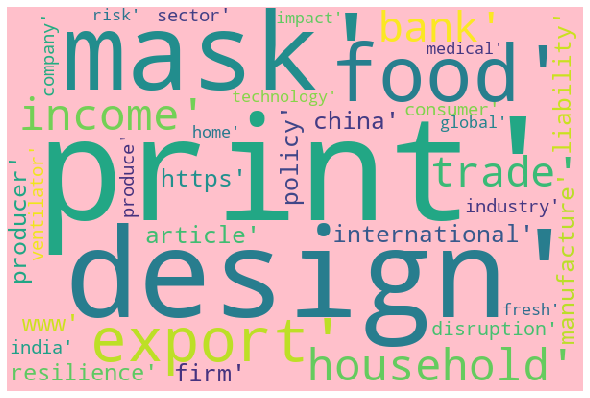

In [394]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

values = ','.join(str(v) for v in clust_key['Cluster 9']) #meaning full cluster 17 15 13 10

wordcloud = WordCloud(width = 600, height = 400, 
            background_color ='pink', 
            stopwords = stopwords, 
            min_font_size = 10).generate(values) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 


## E-M Algorithm Gaussian Mixture Models

In [294]:
pca_2dim = PCA(n_components=2, random_state=42) #2 components
X_2dim= pca_2dim.fit_transform(X.toarray())
X_2dim

array([[ 0.18400362,  0.33297072],
       [ 0.01576065, -0.05539902],
       [ 0.00269391, -0.08259764],
       ...,
       [-0.05334516,  0.14116855],
       [ 0.31494336, -0.33159772],
       [-0.27925113,  0.00416534]])

In [295]:
k = 10
kmeans_2d = KMeans(n_clusters=k, random_state=42)
y_2dim = kmeans_2d.fit_predict(X_2dim)
df['y_2dim'] = y_2dim

/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 0, 'K-means clusters')

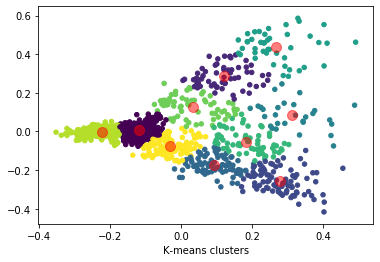

In [390]:
#Plot it but clusters are not apart from each other.
plt.scatter(X_2dim[:, 0], X_2dim[:, 1], c=y_2dim, s=20, cmap='viridis')

centers = kmeans_2d.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);
plt.xlabel('K-means clusters')

## Motivating GMM: Weaknesses of k-Means
K-means finds suitable clustering result for well-separated data. For example, if we have simple binary large object of data, the k-means algorithm can easily label those observations in a way that closely matches what we might see: **Plot 2dim**

**Giai thich cai plot tren**From an intuitive standpoint, we might expect that the clustering assignment for some points is more certain than others: for example, there appears to be a very slight overlap between the two middle clusters, such that we might not have complete confidence in the cluster assigment of points between them. Unfortunately, the k-means model has no intrinsic measure of probability or uncertainty of cluster assignments (although it may be possible to use a bootstrap approach to estimate this uncertainty). For this, we must think about generalizing the model.

One Weakness of k-means method is that it places a circle (or, in higher dimensions, a hyper-sphere) at the center of each cluster, with a radius defined by the most distant point in the cluster. This radius acts as a hard cutoff for cluster assignment within the training set: any point outside this circle is not considered a member of the cluster. We can visualize this cluster model with the following function:

https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

## co the plot 2dim voi hinh tron
An important observation for k-means is that these cluster models must be circular: k-means has no built-in way of accounting for oblong or elliptical clusters. So, for example, if we take the same data and transform it, the cluster assignments end up becoming muddled:

By eye, we recognize that these transformed clusters are non-circular, and thus circular clusters would be a poor fit. Nevertheless, k-means is not flexible enough to account for this, and tries to force-fit the data into four circular clusters. This results in a mixing of cluster assignments where the resulting circles overlap: see especially the bottom-right of this plot. One might imagine addressing this particular situation by preprocessing the data with PCA (see In Depth: Principal Component Analysis), but in practice there is no guarantee that such a global operation will circularize the individual data.

These two disadvantages of k-means—its lack of flexibility in cluster shape and lack of probabilistic cluster assignment—mean that for many datasets (especially low-dimensional datasets) it may not perform as well as you might hope.

You might imagine addressing these weaknesses by generalizing the k-means model: for example, you could measure uncertainty in cluster assignment by comparing the distances of each point to all cluster centers, rather than focusing on just the closest. You might also imagine allowing the cluster boundaries to be ellipses rather than circles, so as to account for non-circular clusters. It turns out these are two essential components of a different type of clustering model, Gaussian mixture models.

## Generalizing E–M: Gaussian Mixture Models
A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. In the simplest case, GMMs can be used for finding clusters in the same manner as k-means:

In [298]:
!pip install -Iv scikit-learn==0.1

Created temporary directory: /private/var/folders/v4/krlcpnt52353p49_jcdkjjnw0000gn/T/pip-ephem-wheel-cache-1b9wzzx0
Created temporary directory: /private/var/folders/v4/krlcpnt52353p49_jcdkjjnw0000gn/T/pip-req-tracker-fm0xb0f0
Created requirements tracker '/private/var/folders/v4/krlcpnt52353p49_jcdkjjnw0000gn/T/pip-req-tracker-fm0xb0f0'
Created temporary directory: /private/var/folders/v4/krlcpnt52353p49_jcdkjjnw0000gn/T/pip-install-rt2h9y91
  1 location(s) to search for versions of scikit-learn:
  * https://pypi.org/simple/scikit-learn/
  Getting page https://pypi.org/simple/scikit-learn/
  Found index url https://pypi.org/simple
  Getting credentials from keyring for https://pypi.org/simple
  Getting credentials from keyring for pypi.org
  Looking up "https://pypi.org/simple/scikit-learn/" in the cache
  Request header has "max_age" as 0, cache bypassed
  Starting new HTTPS connection (1): pypi.org:443
  https://pypi.org:443 "GET /simple/scikit-learn/ HTTP/1.1" 304 0
  Analyzing li

    Skipping link: none of the wheel's tags match: cp34-cp34m-macosx_10_6_intel, cp34-cp34m-macosx_10_9_intel, cp34-cp34m-macosx_10_9_x86_64: https://files.pythonhosted.org/packages/fa/d0/1be9dfdbf3124cea27c3fcd2cc4bcc4a7c1a3c389edfdd602ab2085e4fd9/scikit_learn-0.15.0b2-cp34-cp34m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.whl#sha256=338a01e79a6199619f018d8ee0fd2f43ef2290c1e8533d8d16cfc64e009248ba (from https://pypi.org/simple/scikit-learn/)
    Skipping link: none of the wheel's tags match: cp34-none-win32: https://files.pythonhosted.org/packages/45/5c/a9676c2c8eef3ede4bb415a169620d8eb533f73c24979f1d365266a4676b/scikit_learn-0.15.0b2-cp34-none-win32.whl#sha256=909a78f313667e78102404816fee73b6a4686d58f38aed6fa5716b9050c47b9f (from https://pypi.org/simple/scikit-learn/)
    Found link https://files.pythonhosted.org/packages/a2/f4/ea25fe640fadca8a8d860a397f77c427737fbdbc3edb04e8070680f850a0/scikit-learn-0.15.0.tar.gz#sha256=67ae5dbe5c1a28b469007708d65c59b0af192b2a9396c33d0b26

    Skipping link: none of the wheel's tags match: cp34-cp34m-manylinux1_i686: https://files.pythonhosted.org/packages/b6/ae/436ba89538ba09143255bc3a53f274bef594c6d70aca6967970c94363e51/scikit_learn-0.18-cp34-cp34m-manylinux1_i686.whl#sha256=ae0c7891dff7b554e739242a5f6d259161c10b64a1135621b54a0fb93bc9a600 (from https://pypi.org/simple/scikit-learn/)
    Skipping link: none of the wheel's tags match: cp34-cp34m-manylinux1_x86_64: https://files.pythonhosted.org/packages/34/f8/f51fc4253178b387599b36c875ce3ae8b4b4a5aea78833a826a269cbb53c/scikit_learn-0.18-cp34-cp34m-manylinux1_x86_64.whl#sha256=a78b25b573153902a0f6e9a1aeac402a54510919e0a38d55251f6e391bc1fe48 (from https://pypi.org/simple/scikit-learn/)
    Skipping link: none of the wheel's tags match: cp35-cp35m-macosx_10_10_intel, cp35-cp35m-macosx_10_10_x86_64, cp35-cp35m-macosx_10_6_intel, cp35-cp35m-macosx_10_9_intel, cp35-cp35m-macosx_10_9_x86_64: https://files.pythonhosted.org/packages/ff/23/0dd76ac9020d7d4edc3e2bac7dcef3d416e1c183e

    Skipping link: none of the wheel's tags match: cp34-cp34m-win_amd64: https://files.pythonhosted.org/packages/0a/4d/f56b67271877db6a97f5b00758ab45c9798b2195e278890b2a6c93758d3a/scikit_learn-0.19.1-cp34-cp34m-win_amd64.whl#sha256=42f3c5bd893ed73bf47ccccf04dfb98fae743f397d688bb58c2238c0e6ec15d2 (from https://pypi.org/simple/scikit-learn/)
    Skipping link: none of the wheel's tags match: cp35-cp35m-macosx_10_10_intel, cp35-cp35m-macosx_10_10_x86_64, cp35-cp35m-macosx_10_6_intel, cp35-cp35m-macosx_10_9_intel, cp35-cp35m-macosx_10_9_x86_64: https://files.pythonhosted.org/packages/5f/14/e1fa556619b2c9c5b9a121c6dad04277675897c870e51f68c2c25bfa197b/scikit_learn-0.19.1-cp35-cp35m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl#sha256=95b155ef6bf829ddfba6026f100ba8e4218b7171ecab97b2163bc9e8d206848f (from https://pypi.org/simple/scikit-learn/)
    Skipping link: none of the wheel's tags match: cp35-cp35m-manylinux1_i686: https://files.pythonh

    Skipping link: none of the wheel's tags match: cp34-cp34m-manylinux1_x86_64: https://files.pythonhosted.org/packages/38/5a/4b1c9c56cfcdc727d977d6698de10b749a8e0f487c519125d9eecd9613ed/scikit_learn-0.20.2-cp34-cp34m-manylinux1_x86_64.whl#sha256=d3b4f791d2645fe936579d61f1ff9b5dcf0c8f50db7f0245ca8f16407d7a5a46 (from https://pypi.org/simple/scikit-learn/)
    Skipping link: none of the wheel's tags match: cp34-cp34m-win32: https://files.pythonhosted.org/packages/54/3e/f5db27c699a6feb66868d8e090cb73b22e795fdf50217536149448bd1e67/scikit_learn-0.20.2-cp34-cp34m-win32.whl#sha256=3771861abe1fd1b2bbeaec7ba8cfca58fdedd75d790f099960e5332af9d1ff7a (from https://pypi.org/simple/scikit-learn/)
    Skipping link: none of the wheel's tags match: cp34-cp34m-win_amd64: https://files.pythonhosted.org/packages/d1/36/e996e353610f1b5355aaa99913ec9b9986c7461f9035e997f3279c3192f8/scikit_learn-0.20.2-cp34-cp34m-win_amd64.whl#sha256=071317afbb5c67fa493635376ddd724b414290255cbf6947c1155846956e93f7 (from https

    Found link https://files.pythonhosted.org/packages/57/5c/133b464c8d0be7ac8c9414b6ff2ae848808a35ce03b146fc2c43777e51f9/scikit-learn-0.21.2.tar.gz#sha256=0aafc312a55ebf58073151b9308761a5fcfa45b7f7730cea4b1f066f824c72db (from https://pypi.org/simple/scikit-learn/) (requires-python:>=3.5), version: 0.21.2
    Skipping link: none of the wheel's tags match: cp35-cp35m-macosx_10_10_intel, cp35-cp35m-macosx_10_10_x86_64, cp35-cp35m-macosx_10_6_intel, cp35-cp35m-macosx_10_9_intel, cp35-cp35m-macosx_10_9_x86_64: https://files.pythonhosted.org/packages/b0/54/d9040c72a690d216b1bb1d81385007e2a1fb2d5e04bdc4e10c1f5ead1018/scikit_learn-0.21.2-cp35-cp35m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl#sha256=f979bb85cbfd9ed4d54709d86ab8893b316726abd1c9ab04abe7e6414b71b753 (from https://pypi.org/simple/scikit-learn/) (requires-python:>=3.5)
    Skipping link: none of the wheel's tags match: cp35-cp35m-manylinux1_i686: https://files.pythonhosted.org/p

    Skipping link: none of the wheel's tags match: cp35-cp35m-win_amd64: https://files.pythonhosted.org/packages/0e/1c/6156a0941d512dabfe5f53eed3665c6b4711fe7a91b5e9cc362a4e41b9e9/scikit_learn-0.22.2.post1-cp35-cp35m-win_amd64.whl#sha256=349ba3d837fb3f7cb2b91486c43713e4b7de17f9e852f165049b1b7ac2f81478 (from https://pypi.org/simple/scikit-learn/) (requires-python:>=3.5)
    Skipping link: none of the wheel's tags match: cp36-cp36m-macosx_10_9_x86_64: https://files.pythonhosted.org/packages/0c/e1/b640df8f5cc31842953ab26b50bb4735ed3ec92712c2b47ceb712a96a926/scikit_learn-0.22.2.post1-cp36-cp36m-macosx_10_9_x86_64.whl#sha256=73207dca6e70f8f611f28add185cf3a793c8232a1722f21d82259560dc35cd50 (from https://pypi.org/simple/scikit-learn/) (requires-python:>=3.5)
    Skipping link: none of the wheel's tags match: cp36-cp36m-manylinux1_i686: https://files.pythonhosted.org/packages/4d/d0/e7cc6425c906015ddc4c5c97490eac46ee708e443e23b33ce318b38f499e/scikit_learn-0.22.2.post1-cp36-cp36m-manylinux1_i686

    Skipping link: none of the wheel's tags match: cp38-cp38-manylinux2010_x86_64: https://files.pythonhosted.org/packages/09/b9/2aa016aec6cc84defebfe6744d48cd38b78dfe8202dc607e5371acfaba9c/scikit_learn-0.24.0rc1-cp38-cp38-manylinux2010_x86_64.whl#sha256=69be029f08a1b8d13cfd482246bf1b3088546091f2616fe6eb124658c17f4936 (from https://pypi.org/simple/scikit-learn/) (requires-python:>=3.6)
    Skipping link: none of the wheel's tags match: cp38-cp38-win32: https://files.pythonhosted.org/packages/60/39/816148d9ac2c410fca2e40ea0f77ac72f6f6d48ae8a297e43eee0c29706e/scikit_learn-0.24.0rc1-cp38-cp38-win32.whl#sha256=a238e4d1800682a5ad6eb02f1c4f454309cbb49deb8689b906ab84b588003486 (from https://pypi.org/simple/scikit-learn/) (requires-python:>=3.6)
    Skipping link: none of the wheel's tags match: cp38-cp38-win_amd64: https://files.pythonhosted.org/packages/c7/f8/ef11fd795593b3ba96499b6bbdbba824eb9dbcafc93d52ee84b6ac4bd920/scikit_learn-0.24.0rc1-cp38-cp38-win_amd64.whl#sha256=764017db19fa3cca276

  Found link https://files.pythonhosted.org/packages/c5/0e/c974206726542bc495fc7443dd97834a6d14c2f0cba183fcfcd01075225a/pip-6.0.4-py2.py3-none-any.whl#sha256=8dfd95de29a7a3bb1e7d368cc83d566938eb210b04d553ebfe5e3a422f4aec65 (from https://pypi.org/simple/pip/), version: 6.0.4
  Found link https://files.pythonhosted.org/packages/02/a1/c90f19910ee153d7a0efca7216758121118d7e93084276541383fe9ca82e/pip-6.0.4.tar.gz#sha256=1dbbff9c369e510c7468ab68ba52c003f68f83c99c2f8259acd51099e8799f1e (from https://pypi.org/simple/pip/), version: 6.0.4
  Found link https://files.pythonhosted.org/packages/e9/1b/c6a375a337fb576784cdea3700f6c3eaf1420f0a01458e6e034cc178a84a/pip-6.0.5-py2.py3-none-any.whl#sha256=b2c20e3a2a43b2bbb1d19ad98be27eccc7b0f0ece016da602ccaa757a862b0e2 (from https://pypi.org/simple/pip/), version: 6.0.5
  Found link https://files.pythonhosted.org/packages/19/f2/58628768f618c8c9fea878e0fb97730c0b8a838d3ab3f325768bf12dac94/pip-6.0.5.tar.gz#sha256=3bf42d28be9085ab2e9aecfd69a6da2d31563fe833304

  Found link https://files.pythonhosted.org/packages/aa/1a/62fb0b95b1572c76dbc3cc31124a8b6866cbe9139eb7659ac7349457cf7c/pip-19.2.2.tar.gz#sha256=e05103825871e210d50a44c7e448587b0ed99dd775d3ef586304c58f40224a53 (from https://pypi.org/simple/pip/) (requires-python:>=2.7,!=3.0.*,!=3.1.*,!=3.2.*,!=3.3.*,!=3.4.*), version: 19.2.2
  Found link https://files.pythonhosted.org/packages/30/db/9e38760b32e3e7f40cce46dd5fb107b8c73840df38f0046d8e6514e675a1/pip-19.2.3-py2.py3-none-any.whl#sha256=340a0ba40fdeb16413914c0fcd8e0b4ebb0bf39a900ec80e11c05d836c05103f (from https://pypi.org/simple/pip/) (requires-python:>=2.7,!=3.0.*,!=3.1.*,!=3.2.*,!=3.3.*,!=3.4.*), version: 19.2.3
  Found link https://files.pythonhosted.org/packages/00/9e/4c83a0950d8bdec0b4ca72afd2f9cea92d08eb7c1a768363f2ea458d08b4/pip-19.2.3.tar.gz#sha256=e7a31f147974362e6c82d84b91c7f2bdf57e4d3163d3d454e6c3e71944d67135 (from https://pypi.org/simple/pip/) (requires-python:>=2.7,!=3.0.*,!=3.1.*,!=3.2.*,!=3.3.*,!=3.4.*), version: 19.2.3
  Fou

Given no hashes to check 155 links for project 'pip': discarding no candidates


Text(0.5, 0, 'GMM 10 clusters')

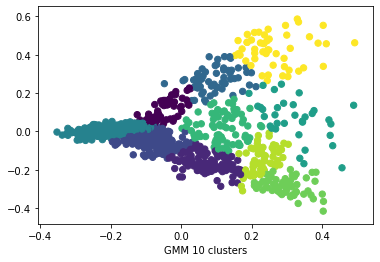

In [389]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=10, covariance_type='full')
gmm = model.fit(X_2dim)
labels = gmm.predict(X_2dim)
plt.scatter(X_2dim[:, 0], X_2dim[:, 1], c=labels, s=40, cmap='viridis');
plt.xlabel('GMM 10 clusters')

# probabilistic model 
But because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments—in Scikit-Learn this is done using the predict_proba method. This returns a matrix of size [n_samples, n_clusters] which measures the probability that any point belongs to the given cluster

In [364]:
import seaborn as sns

In [365]:

probs = gmm.predict_proba(X_2dim)
#print(probs[:5].round(3))
#probs.shape
qa = pd.DataFrame(probs.round(3)) #966 rows x 10 columns
cm = sns.light_palette("red", as_cmap=True)
qa.style.background_gradient(cmap=cm)

## How many components?
The fact that GMM is a generative model gives us a natural means of determining the optimal number of components for a given dataset. We can evaluate the likelihood of the data under the GMM model, using cross-validation to avoid over-fitting. Another means of correcting for over-fitting is to adjust the model likelihoods using some analytic criterion such as the Akaike information criterion (AIC) or the Bayesian information criterion (BIC). Scikit-Learn's GMM estimator actually includes built-in methods that compute both of these, and so it is very easy to operate on this approach.

Let's look at the AIC and BIC as a function as the number of GMM components for our moon dataset:


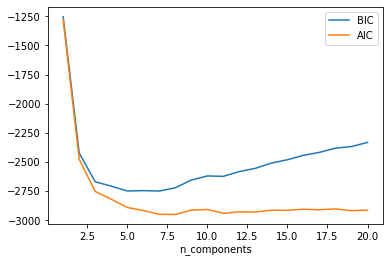

In [332]:
#gmm = mixture.GaussianMixture(n_components=10, covariance_type='full').fit(X_2dim)
n_components = np.arange(1, 21)
models = [mixture.GaussianMixture(n_components=n, covariance_type='full', random_state = 42).fit(X_2dim) for n in n_components]

plt.plot(n_components, [m.bic(X_2dim) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_2dim) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. The AIC tells us that our choice of 10 components above was probably not the best: either 7 or 8 components would have been a better option. Meanwhile, the BIC recommends 5 components model.So we choose 6 components as a compromise.

Text(0.5, 0, 'GMM clusters')

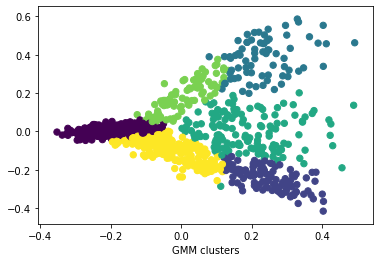

In [387]:
gmm1 = mixture.GaussianMixture(n_components=6, covariance_type='full').fit(X_2dim)
y_gmm = gmm1.predict(X_2dim)
plt.scatter(X_2dim[:, 0], X_2dim[:, 1], c=y_gmm, s=40, cmap='viridis');

plt.xlabel('GMM clusters')

https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

In [340]:
df['y_gmm'] = y_gmm #add Y_gmm to the dataframe

/Users/Jyanqa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:

        
# number of topics per cluster
NUM_TOPICS_PER_CLUSTER = len(vectorized_data)

lda_models = []
for ii in range(0, 17):
    # Latent Dirichlet Allocation Model
    lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online',verbose=False, random_state=42)
    lda_models.append(lda)
    
lda_models[0]

#fit_transform all the LDA models on their respective cluster vectors
clusters_lda_data = []

for current_cluster, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_cluster))
    
    if vectorized_data[current_cluster] != None:
        clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))

# Func. printing keywords for each topic
def selected_topics(model, vectorizer, top_n=5):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

all_keywords = []
for current_vectorizer, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_vectorizer))

    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))



In [344]:
vectorizers_gmm = []
for ii in range(0, 6):
    # Creating a vectorizer
    vectorizers_gmm.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))
vectorizers[0] 

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='[a-zA-Z\\-][a-zA-Z\\-]{2,}',
                tokenizer=None, vocabulary=None)

In [345]:
#we will vectorize the data from each of our clusters
vectorized_data_gmm = []

for current_cluster, cvec in enumerate(vectorizers_gmm):
    try:
        vectorized_data_gmm.append(cvec.fit_transform(df.loc[df['y_gmm'] == current_cluster, 'processed_text']))
    except Exception as e:
        print("Not enough instances in cluster: " + str(current_cluster))
        vectorized_data_gmm.append(None)

In [346]:
 len(vectorized_data_gmm)

6

In [347]:
# number of topics per cluster
NUM_TOPICS_PER_CLUSTER = len(vectorized_data_gmm)

lda_models_gmm = []
for ii in range(0, len(vectorized_data_gmm)):
    # Latent Dirichlet Allocation Model
    lda1 = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online',verbose=False, random_state=42)
    lda_models_gmm.append(lda1)
    
lda_models_gmm[0]



LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=6, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=False)

In [348]:
#fit_transform all the LDA models on their respective cluster vectors
clusters_lda_gmm = []

for current_cluster, lda1 in enumerate(lda_models_gmm):
    
    if vectorized_data_gmm[current_cluster] != None:
        clusters_lda_gmm.append((lda1.fit_transform(vectorized_data_gmm[current_cluster])))



In [354]:
# Func. printing keywords for each topic
def selected_topics(model, vectorizer, top_n=5):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

all_keywords_gmm = []
for current_vectorizer, lda1 in enumerate(lda_models_gmm):
    # print("Current Cluster: " + str(current_vectorizer))

    if vectorized_data_gmm[current_vectorizer] != None:
        all_keywords_gmm.append(selected_topics(lda1, vectorizers_gmm[current_vectorizer]))



In [355]:
len(all_keywords_gmm)

6

In [356]:
clust_gmm = pd.DataFrame([all_keywords_gmm])
clust_gmm.columns =['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4','Cluster 5','Cluster 6']

In [386]:
clust_gmm

Cluster 1  \
0  [vaccine, sequence, antibody, clinical, immune, interaction, genome, mutation, site, transmission, spread, bat, analysis, drug, ace, sars-cov, response, patient]   

                                                                                                                                                                                             Cluster 2  \
0  [social, student, model, learn, people, health, datum, country, firm, public, online, government, case, supply, market, education, numb, food, return, work, economic, period, policy, mask, value]   

                                                                                                                                                                                       Cluster 3  \
0  [model, image, datum, case, study, patient, care, anxiety, country, test, state, population, mental, numb, staff, report, hospital, people, telehealth, survey, group, pharmacist, therapist]   

                                                                                                                                                                           Cluster 4  \
0  [protein, pro, cell, surface, structure, assay, rna, human, bind, sars-cov-, target, nsp, filter, model, datum, vaccine, cluster, transmission, setting, method, covid-, problem]   

                                                                                                                                                                                               Cluster 5  \
0  [image, chest, lung, opacity, finding, cancer, symptom, care, pulmonary, hospital, treatment, day, risk, surgery, mortality, use, contact, room, transmission, need, embolism, covid, cohort, strain]   

                                                                                                                                                                    Cluster 6  
0  [symptom, viral, fever, risk, test, sars-cov-, cell, immune, use, treatment, lung, virus, child, transmission, case, vitamin, aki, medical, bcg, lesion, adverse, country]

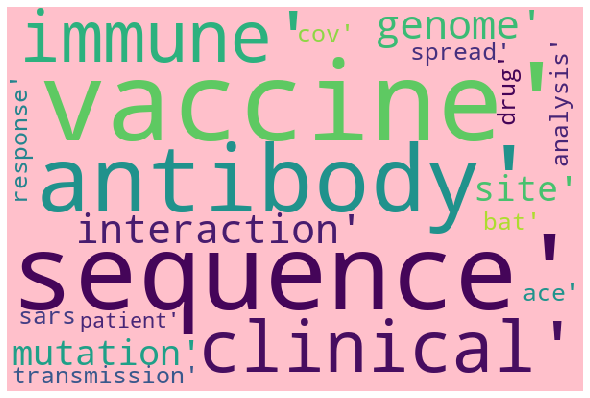

In [362]:
value1 = ','.join(str(v) for v in clust_gmm['Cluster 1']) 
wordcloud1 = WordCloud(width = 600, height = 400, 
            background_color ='pink', 
            stopwords = stopwords, 
            min_font_size = 10).generate(value1) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

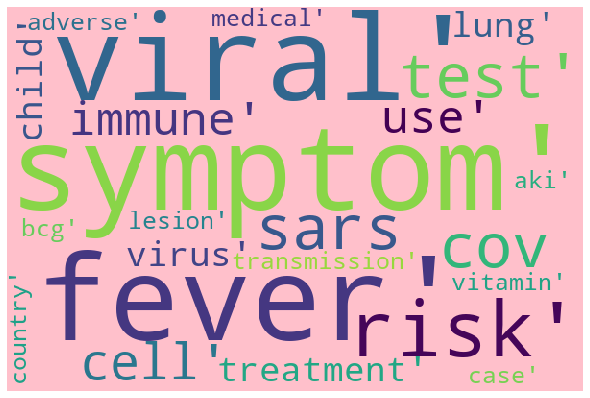

In [383]:
value1 = ','.join(str(v) for v in clust_gmm['Cluster 6']) 
wordcloud1 = WordCloud(width = 600, height = 400, 
            background_color ='pink', 
            stopwords = stopwords, 
            min_font_size = 10).generate(value1) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

## GMM vs K-Means
The first visible difference between K-Means and Gaussian Mixtures is the shape the decision boundaries. GMs are somewhat more flexible and with a covariance matrix ∑ we can make the boundaries elliptical, as opposed to circular boundaries with K-means. Another thing is that GMs is a probabilistic algorithm.